## Background information
In Vietnam, in the last few years, High School Graduation Test score is used as sole factor for student admission.
This year an incident has spurred and spreaded like wildfire. Nearly more than one hundred students have got sky-high score while the test has been deemed as the most difficult for the last few years.

We will explore the dataset of score of Ha Giang students to see if there is anything interesting. Let's get to it!

<h2> Read data from URL

In [87]:
url = 'https://github.com/maiing/datatalk/blob/master/diem_thi_THPT_2018/THPT%202018%20Ha%20Giang.csv'

## open url with urlopen
#response = urlopen(url, 'rt')
#
## open url with requests
#import requests
#
#r = requests.get(url)
#response = r.iter_lines()
#
## open url with open
#import codecs
##ifile = open(url, 'rb')
#
## read with csv
#import csv
#cr = csv.reader(response)
#cr2 = codecs.iterdecode(cr, 'utf-8')
#
#cr = csv.reader(response, delimiter = ',')
#
#for row in cr2:
#    print(row)
### issue is to deal with csv.reader object


I keep failing to read this data properly from url. So I'm gonna skip it for now and download it to my machine.

<h2> Keep it (and almost everything) simple by using pandas

In [88]:
import pandas as pd
import numpy as np

import os
path = os.getcwd() + '//datatalk//diem_thi_THPT_2018//THPT_2018_Ha_Giang.csv'
data = pd.read_csv(path)

print(data.head())
print('\n')
print("All columns' names are: {}".format(list(data)))
print('\n')
# same with print(list(data.columns.values))

# how many rows in this set at Ha Giang
print("There are {} students has score at Ha Giang".format(data['ID'].count()))

   ID     SoBD  Math  Viet  English  Physics  Chemistry  Biology  History  \
0   1  5002915   1.4  2.00      3.4      NaN        NaN      NaN     2.25   
1   2  5000921   5.6  4.75      2.4     6.50       3.75     3.50     2.75   
2   3  5000863   3.8  3.50      4.0     2.75       2.75     2.75     2.50   
3   4  5000867   2.4  2.75      3.0     2.00       3.50     3.25     4.25   
4   5  5000909   9.4  3.25      9.6     9.00       3.25     3.00      NaN   

   Geography  KhoiA  KhoiB  KhoiC  KhoiD  KhoiA1  
0       5.25    NaN    NaN   9.50   6.80     NaN  
1       6.75  15.85  12.85  14.25  12.75   14.50  
2       3.75   9.30   9.30   9.75  11.30   10.55  
3       5.00   7.90   9.15  12.00   8.15    7.40  
4        NaN  21.65  15.65    NaN  22.25   28.00  


All columns' names are: ['ID', 'SoBD', 'Math', 'Viet', 'English', 'Physics', 'Chemistry', 'Biology', 'History', 'Geography', 'KhoiA', 'KhoiB', 'KhoiC', 'KhoiD', 'KhoiA1']


There are 3213 students has score at Ha Giang


<h2>Checking basic statistics of few subjects' scores

In [89]:
# highest math score
data['Math'].max()
print('Highest math score is {}'.format(data['Math'].max()))
print('Lowest literature score is {}'.format(data['Viet'].min()))
print('Average english score is {}'.format(data['English'].mean()))
print('Highest physics score is {}'.format(data['Physics'].max()))


Highest math score is 9.8
Lowest literature score is 0.5
Average english score is 3.0672897196261673
Highest physics score is 9.75


## Using loop to gather insight quickly
A simple print() can give us one or two numbers, but combined with a loop and we can have a much comprehensive picture.

In [90]:

subjects = ['Math', 'Viet', 'English', 'Physics', 'Chemistry', 'Biology', 'History', 'Geography']

#or better
subjects = list(data)[2:10]

for subject in subjects:
    print('Highest {} score is {}'.format(subject, data[subject].max()))
    print('Lowest {} score is {}'.format(subject, data[subject].min()))
    print('Average {} score is {}'.format(subject, round(data[subject].mean(),1)))
    print('Bottom of top 20% of {} score is {}'.format(subject, round(data[subject].quantile(0.8),1)))
    print('Top of bottom 20% of {} score is {}'.format(subject, round(data[subject].quantile(0.2),1)))
    print('\n')

Highest Math score is 9.8
Lowest Math score is 1.0
Average Math score is 3.6
Bottom of top 20% of Math score is 4.6
Top of bottom 20% of Math score is 2.4


Highest Viet score is 9.0
Lowest Viet score is 0.5
Average Viet score is 4.4
Bottom of top 20% of Viet score is 6.0
Top of bottom 20% of Viet score is 3.0


Highest English score is 10.0
Lowest English score is 0.6
Average English score is 3.1
Bottom of top 20% of English score is 3.6
Top of bottom 20% of English score is 2.2


Highest Physics score is 9.75
Lowest Physics score is 1.0
Average Physics score is 4.6
Bottom of top 20% of Physics score is 6.5
Top of bottom 20% of Physics score is 2.5


Highest Chemistry score is 9.75
Lowest Chemistry score is 0.75
Average Chemistry score is 4.4
Bottom of top 20% of Chemistry score is 6.0
Top of bottom 20% of Chemistry score is 2.8


Highest Biology score is 9.75
Lowest Biology score is 1.25
Average Biology score is 4.1
Bottom of top 20% of Biology score is 5.2
Top of bottom 20% of Biolo

## An easier way to do numerical summarization in python
describe() can quickly give out most important statistics of a vector. We will use this, see what else we don't know yet.


In [91]:
for subject in subjects:
    print(data[subject].describe().transpose())
    print('\n')

count    3203.000000
mean        3.627474
std         1.600482
min         1.000000
25%         2.600000
50%         3.200000
75%         4.200000
max         9.800000
Name: Math, dtype: float64


count    3135.000000
mean        4.435407
std         1.615234
min         0.500000
25%         3.250000
50%         4.250000
75%         5.500000
max         9.000000
Name: Viet, dtype: float64


count    2996.000000
mean        3.067290
std         1.307693
min         0.600000
25%         2.400000
50%         2.800000
75%         3.400000
max        10.000000
Name: English, dtype: float64


count    686.000000
mean       4.594752
std        2.281140
min        1.000000
25%        2.750000
50%        4.000000
75%        6.000000
max        9.750000
Name: Physics, dtype: float64


count    674.000000
mean       4.413576
std        2.040190
min        0.750000
25%        2.750000
50%        4.000000
75%        5.500000
max        9.750000
Name: Chemistry, dtype: float64


count    640.000000


Okay so we have also standard deviation, some quartiles of each in every subject. 
### Let's see that we can construct neater structure by putting them all into a data frame


In [92]:
#single operation
a = data['Math'].describe().to_frame().transpose()
b = data['Viet'].describe().to_frame().transpose()
c = pd.concat([a, b], axis = 0)
# same, but harder to vectorized (hint: using reduce())
d = a.append(b)

#vectorized
all_subject_sum = [data[subject].describe().to_frame().transpose() for subject in subjects]
all_subject_sum_df = pd.concat(all_subject_sum, axis = 0)
all_subject_sum_df 

,count,mean,std,min,25%,50%,75%,max
Math,3203.0,3.627474,1.600482,1.00,2.60,3.20,4.20,9.80
Viet,3135.0,4.435407,1.615234,0.50,3.25,4.25,5.50,9.00
English,2996.0,3.067290,1.307693,0.60,2.40,2.80,3.40,10.00
Physics,686.0,4.594752,2.281140,1.00,2.75,4.00,6.00,9.75
Chemistry,674.0,4.413576,2.040190,0.75,2.75,4.00,5.50,9.75
Biology,640.0,4.123828,1.355811,1.25,3.25,4.00,5.00,9.75
History,2759.0,3.451975,1.118279,0.75,2.75,3.25,4.00,9.75
Geography,2707.0,4.742058,1.355875,0.00,3.75,4.75,5.75,9.00


### Extend to remaining variables
Subjects are not only variables in this dataset. 
We still have some combinations ("Bands", which are just like majors, but for only this Graduation test) to analyze.

In [93]:
# extend it to prefixed subject combinations
subjects= list(data)[2:]
# beautify the result by rounding out number
all_subject_sum = [data[subject].describe().to_frame().transpose().round(1) for subject in subjects]
all_subject_sum_df = pd.concat(all_subject_sum, axis = 0)
all_subject_sum_df 

,count,mean,std,min,25%,50%,75%,max
Math,3203.0,3.6,1.6,1.0,2.6,3.2,4.2,9.8
Viet,3135.0,4.4,1.6,0.5,3.2,4.2,5.5,9.0
English,2996.0,3.1,1.3,0.6,2.4,2.8,3.4,10.0
Physics,686.0,4.6,2.3,1.0,2.8,4.0,6.0,9.8
Chemistry,674.0,4.4,2.0,0.8,2.8,4.0,5.5,9.8
Biology,640.0,4.1,1.4,1.2,3.2,4.0,5.0,9.8
History,2759.0,3.5,1.1,0.8,2.8,3.2,4.0,9.8
Geography,2707.0,4.7,1.4,0.0,3.8,4.8,5.8,9.0
KhoiA,581.0,13.1,5.3,4.8,8.8,12.0,16.3,28.4
KhoiB,570.0,12.9,3.8,5.2,9.6,12.6,15.6,28.0


<h2> Now that you have seen this summary, I bet you did see some interesting points for yourself, while learning some tricks to moving around this dataset by Python. Have fun playing!

# Part 2: is Ha Giang students different from the rest?

First we need to read both dataset of Ha Giang and whole country again.

In [94]:
path_hagiang = os.getcwd() + '//datatalk//diem_thi_THPT_2018//THPT_2018_Ha_Giang.csv'
path_toanquoc = os.getcwd() + '//datatalk//diem_thi_THPT_2018//THPT_2018_Quoc_gia.csv'

score_hagiang = pd.read_csv(path_hagiang)
score_toanquoc = pd.read_csv(path_toanquoc)


C:\Users\phucn\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## We would compare similar statistics of Ha Giang and nation's score to see the difference.

In [95]:
def fast_summary_score(data):    
    subjects = list(data)[2:10]
    all_subject_sum = [data[subject].describe().to_frame().transpose().round(1) for subject in subjects]
    all_subject_sum_df = pd.concat(all_subject_sum, axis = 0)
    return(all_subject_sum_df)

print('Overall summary Ha Giang score')
fast_hagiang = fast_summary_score(score_hagiang)
print(fast_hagiang)
print('\nOverall summary nation score')
fast_toanquoc = fast_summary_score(score_toanquoc)
print(fast_toanquoc)

print('\nDifference of mean')
print(fast_hagiang['mean'] - fast_toanquoc['mean'])
print('\nDifference of quartile 75%')
print(fast_hagiang['75%'] - fast_toanquoc['75%'])



Overall summary Ha Giang score
            count  mean  std  min  25%  50%  75%   max
Math       3203.0   3.6  1.6  1.0  2.6  3.2  4.2   9.8
Viet       3135.0   4.4  1.6  0.5  3.2  4.2  5.5   9.0
English    2996.0   3.1  1.3  0.6  2.4  2.8  3.4  10.0
Physics     686.0   4.6  2.3  1.0  2.8  4.0  6.0   9.8
Chemistry   674.0   4.4  2.0  0.8  2.8  4.0  5.5   9.8
Biology     640.0   4.1  1.4  1.2  3.2  4.0  5.0   9.8
History    2759.0   3.5  1.1  0.8  2.8  3.2  4.0   9.8
Geography  2707.0   4.7  1.4  0.0  3.8  4.8  5.8   9.0

Overall summary nation score
              count  mean  std  min  25%  50%  75%   max
Math       741024.0   4.9  1.4  0.0  3.8  5.0  6.0  10.0
Viet       728309.0   5.4  1.4  0.0  4.5  5.5  6.5   9.8
English    659998.0   3.9  1.6  0.0  2.8  3.6  4.6  10.0
Physics    323353.0   5.0  1.5  0.0  3.8  5.0  6.0  10.0
Chemistry  326981.0   4.9  1.5  0.0  3.8  4.8  6.0  10.0
Biology    319605.0   4.6  1.2  0.0  3.8  4.5  5.2  10.0
History    446118.0   3.8  1.2  0.0  3.0  3.8

In general we see that some Ha Giang have both mean and 25% lower significantly than whole nation.

### Hoping that I can catch something, I will try to check naive histogram to see something interesting come up.

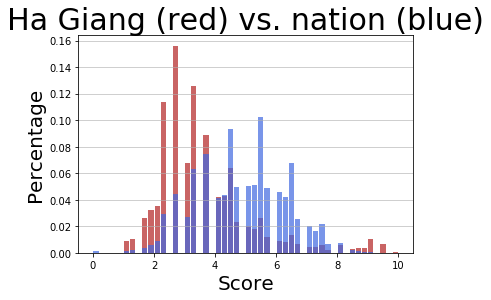

In [96]:
# analyze via viasualization
import matplotlib.pyplot as plt
weights_hagiang = np.ones_like(score_hagiang['Math'].dropna())/float(len(score_hagiang['Math'].dropna()))
n1, bins, patches = plt.hist(x = score_hagiang['Math'][~np.isnan(score_hagiang['Math'])], bins = 50, color = 'firebrick',
                            alpha = 0.7, rwidth = 0.85, range = [0,10], weights = weights_hagiang)
weights_toanquoc = np.ones_like(score_toanquoc['Math'].dropna())/float(len(score_toanquoc['Math'].dropna()))
n2, bins, patches = plt.hist(x = score_toanquoc['Math'][~np.isnan(score_toanquoc['Math'])], bins = 50, color = 'royalblue'
                            , alpha = 0.7, rwidth = 0.85, range = [0,10], weights = weights_toanquoc)
plt.title('Ha Giang (red) vs. nation (blue)', size = 30)
plt.xlabel('Score', size = 20)
plt.ylabel('Percentage', size = 20)
plt.grid(axis = 'y', alpha = 0.75)



### So even though Math score of Ha Giang has concentrated around band 2.4-3.8, much lower than band 3-6.4 of nation score band, there are much higher percentage of 'very high' score from 8.4 to 9.6 in Ha Giang score band, which does not happen in nation's. 

Two points above are fundamentally unlikely in nature, so there is high chance of score manipulation toward high score. This would not be statistically difference if Ha Giang has same percentage in around 7.6 to 8.2, where national-wise studens also successfully reached. 

## In last part we used basic statistics and visualization to set and answer quite important hypothesis. Next part is cross-valiation in other subjects, and formal hypothesis testing.